In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline # plot in cell
from sklearn import metrics
import pandas as pd
from scipy import signal
from scipy import stats
import os
from sklearn.model_selection import cross_val_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# for svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import entropy
from numpy import cov
from scipy.signal import find_peaks
import seaborn as sns
import warnings
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


instal thư viện xuất code C

In [ ]:
columns = ['ID','Acc_X', 'Acc_Y', 'Acc_Z','Gyr_X', 'Gyr_Y','Gyr_Z', 'Mag_X', 'Mag_Y', 'Mag_Z']
Activity = [
  '801-Yurume Ileri',
  '802-YurumeGeri',
  '803-TempoluYavasKosu',
  '804-ComelmeKalkma',
  '805-Egilme',
  '806-EgilmeVeAlma',
  '807-Topallama',
  '808-Tokezleme',
  '809-AyakBurkulmasi',
  '811-Sandalye',
  '812-Kanepe',
  '813-HavayaOturma',
  '814-YatagaOturma',
  '815-YatagaUzanma',
  '816-YataktanKalkma'
]
address='/content/drive/MyDrive/NCS Hieu/cong viec thang 4.2022/datapublic/du lieu tho/tonghopdulieu_DTH/'
columns1 = ['ID','Gyr_X', 'Gyr_Y','Gyr_Z','Mag_X','Mag_Y','Mag_Z']

data801 = pd.read_csv(address+Activity[0]+'.txt', header = None, names = columns)
data801= data801.drop(columns = columns1)
data801 = data801.dropna()


data802 = pd.read_csv(address+Activity[1]+'.txt', header = None, names = columns)
data802=data802.drop(columns = columns1)
data802 = data802.dropna()

data803 = pd.read_csv(address+Activity[2]+'.txt', header = None, names = columns)
data803=data803.drop(columns = columns1)
data803 = data803.dropna()

data804 = pd.read_csv(address+Activity[3]+'.txt', header = None, names = columns)
data804=data804.drop(columns = columns1)
data804 = data804.dropna()

data805 = pd.read_csv(address+Activity[4]+'.txt', header = None, names = columns)
data805=data805.drop(columns = columns1)
data805= data805.dropna()

data806 = pd.read_csv(address+Activity[5]+'.txt', header = None, names = columns)
data806 = data806.drop(columns = columns1)
data806 = data806.dropna()

data807 = pd.read_csv(address+Activity[6]+'.txt', header = None, names = columns)
data807 = data807.drop(columns = columns1)
data807 = data807.dropna()

data808 = pd.read_csv(address+Activity[7]+'.txt', header = None, names = columns)
data808 = data808.drop(columns = columns1)
data808 = data808.dropna()

data809 = pd.read_csv(address+Activity[8]+'.txt', header = None, names = columns)
data809 = data809.drop(columns = columns1)
data809 = data809.dropna()

data811 = pd.read_csv(address+Activity[9]+'.txt', header = None, names = columns)
data811=data811.drop(columns = columns1)
data811 = data811.dropna()

data812 = pd.read_csv(address+Activity[10]+'.txt', header = None, names = columns)
data812=data812.drop(columns = columns1)
data812 = data812.dropna()

data813 = pd.read_csv(address+Activity[11]+'.txt', header = None, names = columns)
data813=data813.drop(columns = columns1)
data813 = data813.dropna()

data814 = pd.read_csv(address+Activity[12]+'.txt', header = None, names = columns)
data814 = data814.drop(columns = columns1)
data814 = data814.dropna()

data815 = pd.read_csv(address+Activity[13]+'.txt', header = None, names = columns)
data815 = data815.drop(columns = columns1)
data815 = data815.dropna()

data816 = pd.read_csv(address+Activity[14]+'.txt', header = None, names = columns)
data816 = data816.drop(columns = columns1)
data816 = data816.dropna()

Activity_list = ['Walking','Jogging','Squatting','Bending','Bendp','Limp','TripOver','Sit-down','Lie down','Rising','Standing','Sitting','Lying']
Standing= pd.DataFrame(columns =columns)
list_standing = ['standing1', 'standing2', 'standing3', 'standing4', 'standing5', 'standing6', 'standing7', 'standing11', 'standing12', 'standing13', 'standing14', 'standing15', 'standing16']
for act in list_standing:
  data = []
  data = pd.read_csv(address +act +'.txt', header = None, names = columns)
  Standing= Standing.append(data[int(len(data)/2):int(len(data)*6/10)])
Standing = Standing.drop(columns = columns1)
Standing = Standing.dropna()

Sitting = pd.DataFrame(columns =columns)
list_sitting = ['sitting11', 'sitting12', 'sitting13', 'sitting14', 'sitting16']
for act in list_sitting:
  data = []
  data = pd.read_csv(address +act +'.txt', header = None, names = columns)
  Sitting= Sitting.append(data[0:int(len(data))])
Sitting=Sitting.drop(columns = columns1)
Sitting= Sitting.dropna()

Lying= pd.DataFrame(columns =columns)
list_lying = ['Lying15', 'Lying16']
for act in list_lying:
  data = []
  data = pd.read_csv(address +act +'.txt', header = None, names = columns)
  Lying= Lying.append(data[0:int(len(data))])
Lying=Lying.drop(columns = columns1)
Lying= Lying.dropna()

In [ ]:
total = len(data801) + len(data802) +len(data803) +len(data804) +len(data805) + len(data806)+len(data807)+len(data808)+len(data809) + len(data811) +len(data812) +len(data813)+len(data814) +len(data815) +len(data816)+len(Sitting) + len(Standing) +len(Lying)
print('total = ', total)
print('data_801: {:.2f}'.format(len(data801)/total * 100),'-- ',len(data801))
print('data_802: {:.2f}'.format(len(data802)/total * 100),'-- ',len(data802))
print('data_803: {:.2f}'.format(len(data803)/total * 100),'-- ',len(data803))
print('data_804: {:.2f}'.format(len(data804)/total * 100),'-- ',len(data804))
print('data_805: {:.2f}'.format(len(data805)/total * 100),'-- ',len(data805))
print('data_806: {:.2f}'.format(len(data806)/total * 100),'-- ',len(data806))
print('data_807: {:.2f}'.format(len(data807)/total * 100),'-- ',len(data807))
print('data_808: {:.2f}'.format(len(data807)/total * 100),'-- ',len(data807))
print('data_809: {:.2f}'.format(len(data809)/total * 100),'-- ',len(data809))
print('data_811: {:.2f}'.format(len(data811)/total * 100),'-- ',len(data811))
print('data_812: {:.2f}'.format(len(data812)/total * 100),'-- ',len(data812))
print('data_813: {:.2f}'.format(len(data813)/total * 100),'-- ',len(data813))
print('data_814: {:.2f}'.format(len(data814)/total * 100),'-- ',len(data814))
print('data_815: {:.2f}'.format(len(data815)/total * 100),'-- ',len(data815))
print('data_816: {:.2f}'.format(len(data816)/total * 100),'-- ',len(data816))
print('standing: {:.2f}'.format(len(Standing)/total * 100),'-- ',len(Standing))
print('sitting: {:.2f}'.format(len(Sitting)/total * 100),'-- ',len(Sitting))
print('lying: {:.2f}'.format(len(Lying)/total * 100),'-- ',len(Lying))

total =  252058
data_801: 8.77 --  22100
data_802: 11.27 --  28400
data_803: 6.38 --  16075
data_804: 4.07 --  10250
data_805: 5.34 --  13450
data_806: 3.61 --  9100
data_807: 8.71 --  21950
data_808: 8.71 --  21950
data_809: 1.86 --  4700
data_811: 2.44 --  6150
data_812: 2.89 --  7275
data_813: 2.92 --  7350
data_814: 2.77 --  6975
data_815: 3.72 --  9375
data_816: 4.55 --  11475
standing: 8.75 --  22058
sitting: 10.37 --  26150
lying: 9.63 --  24275


In [ ]:
def train_test_Data(data, size):
  window_size = size * 25
  stride = window_size
  RateTrain = 0.75
  X_data_train = []
  X_data_test = []
  X_data = [data[i:i+window_size] for i in range(0, int(len(data)), stride) if i+window_size<=int(len(data))]
  if RateTrain < 1:
    X_data_test, X_data_train = train_test_split(X_data, test_size=RateTrain)
  else:
    X_data_train = X_data
  return X_data_train, X_data_test
X_801_train,X_801_test = train_test_Data(data801,2)
X_802_train,X_802_test = train_test_Data(data802,2)
X_803_train,X_803_test = train_test_Data(data803,2)
X_804_train,X_804_test = train_test_Data(data804,5)
X_805_train,X_805_test = train_test_Data(data805,1)
X_806_train,X_806_test = train_test_Data(data806,4)
X_807_train,X_807_test = train_test_Data(data807,2)
X_808_train,X_808_test = train_test_Data(data808,2)
X_809_train,X_809_test = train_test_Data(data809,2)
X_811_train,X_811_test = train_test_Data(data811,3)
X_812_train,X_812_test = train_test_Data(data812,3)
X_813_train,X_813_test = train_test_Data(data813,3)
X_814_train,X_814_test = train_test_Data(data814,3)
X_815_train,X_815_test = train_test_Data(data815,3)
X_816_train,X_816_test = train_test_Data(data816,4)
X_standing_train,X_standing_test = train_test_Data(Standing,1)
X_sitting_train,X_sitting_test = train_test_Data(Sitting,1)
X_lying_train,X_lying_test = train_test_Data(Lying,1)
print('walk: ', len(X_801_train)+len(X_801_test)+len(X_802_train) + len(X_802_test))
print('jogging: ', len(X_803_train)+len(X_803_test))
print('squatting: ', len(X_804_train)+len(X_804_test))
print('Bending: ', len(X_805_train)+len(X_805_test))
print('Bending-p: ', len(X_806_train)+len(X_806_test))
print('Limp: ', len(X_807_train)+len(X_807_test))
print('TripOver: ', len(X_808_train)+len(X_808_test)+len(X_809_train)+len(X_809_test))
print('sit down: ', len(X_811_train)+len(X_811_test)+len(X_812_train)+len(X_812_test)+len(X_813_train)+len(X_813_test)+len(X_814_train)+len(X_814_test))
print('Lie down: ', len(X_815_train)+len(X_815_test))
print('Rising: ', len(X_816_train)+len(X_816_test))
print('standing: ', len(X_standing_train)+len(X_standing_test))
print('lying: ', len(X_lying_train)+len(X_lying_test))
print('sitting: ', len(X_sitting_train)+len(X_sitting_test))
# #tao chuoi du lieu va nhan dung de train
data_window_train= []
label_window_train = []
for acts in X_801_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(0)
    
for acts in X_802_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(0)

for acts in X_803_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(1)

for acts in X_804_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(2)

for acts in X_805_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(3)

for acts in X_806_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(4)

for acts in X_807_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(5)

for acts in X_808_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(6)

for acts in X_809_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(6)

for acts in X_811_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(7)

for acts in X_812_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(7)

for acts in X_813_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(7)

for acts in X_814_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(7)

for acts in X_815_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(8)

for acts in X_816_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(9)

for acts in X_standing_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(10)

for acts in X_sitting_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(11)

for acts in X_lying_train:
    data_window_train.append(pd.DataFrame(acts))
    label_window_train.append(12)

print('data\'s length: ', len(data_window_train))
print('label\'s length: ', len(label_window_train))

data_window_test= []
label_window_test = []
for acts in X_801_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(0)
    
for acts in X_802_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(0)

for acts in X_803_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(1)

for acts in X_804_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(2)

for acts in X_805_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(3)

for acts in X_806_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(4)

for acts in X_807_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(5)

for acts in X_808_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(6)

for acts in X_809_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(6)

for acts in X_811_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(7)

for acts in X_812_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(7)

for acts in X_813_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(7)

for acts in X_814_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(7)

for acts in X_815_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(8)

for acts in X_816_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(9)

for acts in X_standing_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(10)

for acts in X_sitting_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(11)

for acts in X_lying_test:
    data_window_test.append(pd.DataFrame(acts))
    label_window_test.append(12)

print('data\'s length: ', len(data_window_test))
print('label\'s length: ', len(label_window_test))

walk:  1010
jogging:  321
squatting:  82
Bending:  538
Bending-p:  91
Limp:  439
TripOver:  193
sit down:  370
Lie down:  125
Rising:  114
standing:  882
lying:  971
sitting:  1046
data's length:  4645
label's length:  4645
data's length:  1537
label's length:  1537


In [ ]:
def correlation(x, y):
  # Finding the mean of the series x and y
  mean_x = sum(x)/float(len(x))
  mean_y = sum(y)/float(len(y))
  # Subtracting mean from the individual elements
  sub_x = [i-mean_x for i in x]
  sub_y = [i-mean_y for i in y]
  # covariance for x and y
  numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])/(float(len(x))-1)
  # Standard Deviation of x and y
  std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])/float(len(x))
  std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])/float(len(y))
  # squaring by 0.5 to find the square root
  denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
  cor = numerator/denominator
  return cor
def cosin_acc(v1, v2):
  arr_v1 = np.array(v1)
  arr_v2 = np.array(v2)
  anpha = (arr_v1[0]*arr_v2[0] + arr_v1[1]*arr_v2[1] +arr_v1[2]*arr_v2[2])/(math.sqrt(arr_v1[0]**2 +arr_v1[1]**2 + arr_v1[2]**2) * math.sqrt(arr_v2[0]**2 +arr_v2[1]**2 + arr_v2[2]**2))
  return anpha
feature_names = ['mean_x', 'mean_y', 'mean_z',
                'rms_x', 'rms_y', 'rms_z',
                'std_x', 'std_y', 'std_z',
                'med_x', 'med_y', 'med_z',
                'min_x','min_y','min_z',
                'max_x','max_y','max_z',
                'range_x','range_y','range_z',
                'AAD_x', 'AAD_y', 'AAD_z',
                'ARA',   
                'corr_xy', 'corr_yz','corr_xz'
                 ]
def featuresFromBuffer(at):
  feat = np.zeros(31) 		
  x = np.array(at['Acc_X'],dtype=np.float64)
  y = np.array(at['Acc_Y'],dtype=np.float64)
  z = np.array(at['Acc_Z'],dtype=np.float64)
 #means
  means = [np.mean(i) for i in [x, y, z]]
  feat[0:3] = means 
  
  #RMS 
  rms = [np.sqrt(np.mean(i**2)) for i in [x, y, z]]
  feat[3:6] = rms

  # Standard deviation
  std = [np.std(i) for i in [x, y, z]]
  feat[6:9] = std

  # # median
  med = [np.median(i) for i in [x, y, z]]
  feat[9:12] = med
  
  #min
  varmin = [np.amin(i) for i in [x, y, z]] 
  feat[12:15] = varmin 

  #max
  varmax = [np.amax(i) for i in [x, y, z]]
  feat[15:18] = varmax 

  #range
  Range = [np.amax(i)-np.amin(i) for i in [x, y, z]]
  feat[18:21] = Range
  
  # average absolute deviation
  AAD = [np.mean(np.abs(i - np.mean(i))) for i in [x, y, z]]
  feat[21:24] = AAD

  # Average Resultant Acceleration
  ARA = np.mean((x**2 + y**2+ z**2)**0.5)
  feat[24:25] = ARA

  # correlation 
  corr_xy = correlation(x,y)
  corr_xz = correlation(x,z)
  corr_yz = correlation(y,z)
  corr = [corr_xy,corr_xz,corr_yz]
  feat[25:28] = corr

  # mean_stop - mean_Start
  means_ = [np.mean(i[(len(i)-12):len(i)]) - np.mean(i[0:12]) for i in [x, y, z]]
  feat[28:31] = means_



  return feat

train_features = []
test_features = []
for action in data_window_train:
    feat = featuresFromBuffer(action)
    train_features.append(feat)

for action in data_window_test:
    feat = featuresFromBuffer(action)
    test_features.append(feat)

In [ ]:
# save model
import pickle
pickle.dump(train_features, open(address+ 'model public/' +'feature_train_public_acc.sav', 'wb'))
pickle.dump(test_features, open(address+ 'model public/' +'feature_test_public_acc.sav', 'wb'))
pickle.dump(label_window_train, open(address + 'model public/' +'label_train_public_acc.sav', 'wb'))
pickle.dump(label_window_test, open(address + 'model public/' +'label_test_public_acc.sav', 'wb'))
pickle.dump(model_RF, open(address+ 'model public/' +'model_RF.sav', 'wb'))
pickle.dump(model_DT, open(address+ 'model public/' +'model_DT.sav', 'wb'))
pickle.dump(model_GBDT, open(address+ 'model public/' +'model_GBDT.sav', 'wb'))
pickle.dump(model_SVM, open(address+ 'model public/' +'model_SVM.sav', 'wb'))
pickle.dump(model_KNN, open(address+ 'model public/' +'model_KNN.sav', 'wb'))

# load model
# import pickle
# model_RF = pickle.load(open(address+ 'model public/' + 'model_rf_acc.sav', 'rb'))
# train_features = pickle.load(open(address+ 'model public/' + 'feature_train_public_acc.sav', 'rb'))
# test_features = pickle.load(open(address+ 'model public/' + 'feature_test_public_acc.sav', 'rb'))
# label_window_train = pickle.load(open(address+ 'model public/' + 'label_train_public_acc.sav', 'rb'))
# label_window_test = pickle.load(open(address+ 'model public/' + 'label_test_public_acc.sav', 'rb'))

In [ ]:
print("Random forest stuffs:")
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=50,max_depth=20).fit(train_features, label_window_train)
print('Accuracy of RF classifier on training set: {:.3f}'
     .format(model_RF.score(train_features, label_window_train)))
print('Accuracy of RF classifier on test set: {:.3f}'
     .format(model_RF.score(test_features, label_window_test)))
score_RF = model_RF.score(test_features, label_window_test)
predictedRF = model_RF.predict(test_features)
confusion_testRF = confusion_matrix(label_window_test, predictedRF)
df_cmRF = pd.DataFrame(confusion_testRF, index = Activity_list, columns = Activity_list)
print("Ma trận nhầm lẫn RF: ")
print(df_cmRF)

# from micromlgen import port
# # print(port(clf1)) #hien thi thuat toan
# with open('RF.h', 'w') as file:
#         file.write(port(model_RF))
# from sklearn.svm import SVC
# SVM = SVC(C=100, gamma=0.06).fit(train_features, label_window_train)
# print("Accuracy on training set: {:.1f}".format(SVM.score(train_features, label_window_train)*100))
# print("Accuracy on test set: {:.1f}".format(SVM.score(test_features, label_window_test)*100))
# # with open('SVM.h', 'w') as file:
# #         file.write(port(SVM))


Random forest stuffs:
Accuracy of RF classifier on training set: 1.000
Accuracy of RF classifier on test set: 0.968
Ma trận nhầm lẫn RF: 
           Walking  Jogging  Squatting  Bending  Bendp  Limp  TripOver  \
Walking        244        0          0        0      0     8         0   
Jogging          2       77          0        0      0     0         1   
Squatting        0        0         13        0      0     0         0   
Bending          0        0          0      134      0     0         0   
Bendp            0        0          0        0     22     0         0   
Limp            14        1          0        0      0    91         3   
TripOver         3        4          0        0      0     2        38   
Sit-down         1        1          0        0      0     0         0   
Lie down         0        0          0        0      0     0         0   
Rising           1        0          0        0      0     0         0   
Standing         0        0          0        0 

In [ ]:
print("\n =============== Decision Tree:") 
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=50).fit(train_features, label_window_train)
print('Accuracy of Decision Tree classifier on training set: {:.1f}'.format(model_DT.score(train_features, label_window_train)*100))
print('Accuracy of Decision Tree classifier on test set: {:.1f}'.format(model_DT.score(test_features, label_window_test)*100))
predictedDT = model_DT.predict(test_features)
confusion_testDT = confusion_matrix(label_window_test, predictedDT)
score_DT = model_DT.score(test_features, label_window_test)
df_cmDT = pd.DataFrame(confusion_testDT, index = Activity_list, columns = Activity_list)
print(df_cmDT)

print("\n =============== Gradient Boosting Decision Tree:")
from sklearn.ensemble import GradientBoostingClassifier
model_GBDT = GradientBoostingClassifier(learning_rate=0.05,max_depth=4,n_estimators=100).fit(train_features, label_window_train)
print('Accuracy of GBDT classifier on training set: {:.1f}'.format(model_GBDT.score(train_features, label_window_train)*100))
print('Accuracy of GBDT classifier on test set: {:.1f}'.format(model_GBDT.score(test_features, label_window_test)*100))
score_GBDT = model_GBDT.score(test_features, label_window_test)
predictedGBDT = model_GBDT.predict(test_features)
confusion_testGBDT = confusion_matrix(label_window_test,predictedGBDT)
df_cmGBDT = pd.DataFrame(confusion_testGBDT, index = Activity_list, columns = Activity_list)
print("Ma trận nhầm lẫn GBDT: ")
print(df_cmGBDT)




 =============== Decision Tree:
Accuracy of Decision Tree classifier on training set: 100.0
Accuracy of Decision Tree classifier on test set: 92.2
           Walking  Jogging  Squatting  Bending  Bendp  Limp  TripOver  \
Walking        223        2          1        0      0    21         3   
Jogging          2       69          0        0      0     1         7   
Squatting        1        1         10        0      0     1         0   
Bending          0        0          0      134      0     0         0   
Bendp            3        1          0        0     13     1         0   
Limp            25        1          0        0      0    78         5   
TripOver         2        3          0        0      0     3        36   
Sit-down         2        1          9        0      1     1         0   
Lie down         0        0          0        0      0     0         0   
Rising           0        0          0        0      0     1         0   
Standing         0        0          0

In [ ]:
print("\n =============== SVM:")
model_SVM = SVC(C=20, gamma='scale').fit(train_features, label_window_train)
print("Accuracy on training set: {:.1f}".format(model_SVM.score(train_features, label_window_train)*100))
print("Accuracy on test set: {:.1f}".format(model_SVM.score(test_features, label_window_test)*100))
predicted_SVM = model_SVM.predict(test_features)
confusion_testSVM = confusion_matrix(label_window_test,predicted_SVM)
df_cmSVM = pd.DataFrame(confusion_testSVM, index = Activity_list, columns = Activity_list)
score_SVM = model_SVM.score(test_features, label_window_test)

print('\n =============== KNeighbor: ')
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance').fit(train_features, label_window_train)
print('Accuracy of K-NN classifier on training set: {:.1f}'.format(model_KNN.score(train_features, label_window_train)*100))
print('Accuracy of K-NN classifier on test set: {:.1f}'.format(model_KNN.score(test_features, label_window_test)*100))
predicted_KNN = model_KNN.predict(test_features)
confusion_tesKNN = confusion_matrix(label_window_test,predicted_KNN)
df_cmKNN = pd.DataFrame(confusion_tesKNN, index = Activity_list, columns = Activity_list)
score_KNN = model_KNN.score(test_features, label_window_test)


 =============== SVM:
Accuracy on training set: 95.7
Accuracy on test set: 94.7

 =============== KNeighbor: 
Accuracy of K-NN classifier on training set: 100.0
Accuracy of K-NN classifier on test set: 95.9


In [ ]:
scores_RF = cross_val_score(model_RF, train_features+test_features, label_window_train + label_window_test, cv=5)
print('>> Mean CV score RF is: ', round(np.mean(scores_RF),3)*100)
print('>> std CV score RF is: ', round(np.std(scores_RF),3)*100)

scores_DT = cross_val_score(model_DT, train_features+test_features, label_window_train + label_window_test, cv=5)
print('>> Mean CV score DT is: ', round(np.mean(scores_DT),3)*100)
print('>> std CV score DT is: ', round(np.std(scores_DT),3)*100)

scores_SVM = cross_val_score(model_SVM, train_features+test_features, label_window_train + label_window_test, cv=5)
print('>> Mean CV score SVM is: ', round(np.mean(scores_SVM),3)*100)
print('>> std CV score SVM is: ', round(np.std(scores_SVM),3)*100)

scores_KNN = cross_val_score(model_KNN, train_features+test_features, label_window_train + label_window_test, cv=5)
print('>> Mean CV score KNN  is: ', round(np.mean(scores_KNN),3)*100)
print('>> std CV score KNN is: ', round(np.std(scores_KNN),3)*100)

scores_GBDT = cross_val_score(model_GBDT, train_features+test_features, label_window_train + label_window_test, cv=5)
print('>> Mean CV score GBDT is: ', round(np.mean(scores_GBDT),3)*100)
print('>> std CV score GBDT is: ', round(np.std(scores_GBDT),3)*100)


>> Mean CV score RF is:  96.0
>> std CV score RF is:  0.5
>> Mean CV score DT is:  92.60000000000001
>> std CV score DT is:  0.7000000000000001
>> Mean CV score SVM is:  94.19999999999999
>> std CV score SVM is:  0.6
>> Mean CV score KNN  is:  94.89999999999999
>> std CV score KNN is:  0.6
>> Mean CV score GBDT is:  95.3
>> std CV score GBDT is:  0.4


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sb
from sklearn.utils.multiclass import unique_labels

target_names = Activity_list



from sklearn.metrics import f1_score

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False, title=None):
    
    cm = confusion_matrix(y_true, y_pred)
    
    n_classes = range(len(unique_labels(y_true, y_pred)))
    classes = classes[n_classes]
    
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("\nNormalized confusion matrix")
    else:
        print('\nConfusion matrix, without normalization')

    print('\n',cm, '\n')

    #metrics.f1_score(y_test, y_pred, labels=np.unique(y_pred))
    
    fig, ax = plt.subplots(figsize = (12,10))
    #Create a 2-dim array include: rows, columns, data
    dataFrame = pd.DataFrame(cm)
    #create a heatmap, annot = True: add text on each cell over heatmap
    if normalize:
        sb.heatmap(dataFrame, annot = True,fmt=".1f")
    else:        
        sb.heatmap(dataFrame, annot = True, fmt="d")
      
    ax.set(xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    sb.set(font_scale = 1.5)
    np.set_printoptions(precision=1) #lam tron
    plt.show();
    


Confusion matrix, without normalization

 [[223   2   1   0   0  21   3   1   0   1   0   0   0]
 [  2  69   0   0   0   1   7   1   0   0   0   0   0]
 [  1   1  10   0   0   1   0   6   0   0   1   0   0]
 [  0   0   0 134   0   0   0   0   0   0   0   0   0]
 [  3   1   0   0  13   1   0   2   1   1   0   0   0]
 [ 25   1   0   0   0  78   5   0   0   0   0   0   0]
 [  2   3   0   0   0   3  36   0   3   0   0   0   0]
 [  2   1   9   0   1   1   0  75   0   1   0   1   0]
 [  0   0   0   0   0   0   0   0  31   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0  27   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 220   0   0]
 [  0   0   0   1   0   0   0   0   0   0   0 260   0]
 [  0   0   0   1   0   0   0   0   0   0   0   0 241]] 



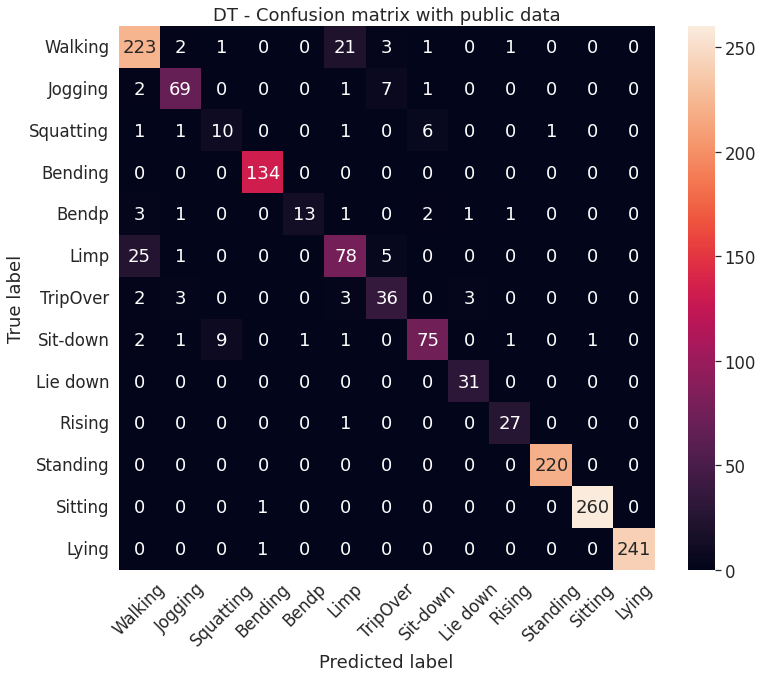

In [ ]:

y_pred = model_DT.predict(test_features)
lables = np.concatenate([target_names, ])

plot_confusion_matrix(label_window_test, y_pred, classes=lables,  
        title='DT - Confusion matrix with public data')


Confusion matrix, without normalization

 [[244   0   0   0   0   8   0   0   0   0   0   0   0]
 [  2  77   0   0   0   0   1   0   0   0   0   0   0]
 [  0   0  13   0   0   0   0   6   0   0   1   0   0]
 [  0   0   0 134   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  22   0   0   0   0   0   0   0   0]
 [ 14   1   0   0   0  91   3   0   0   0   0   0   0]
 [  3   4   0   0   0   2  38   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0  88   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0  31   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0  27   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 220   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 261   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 242]] 



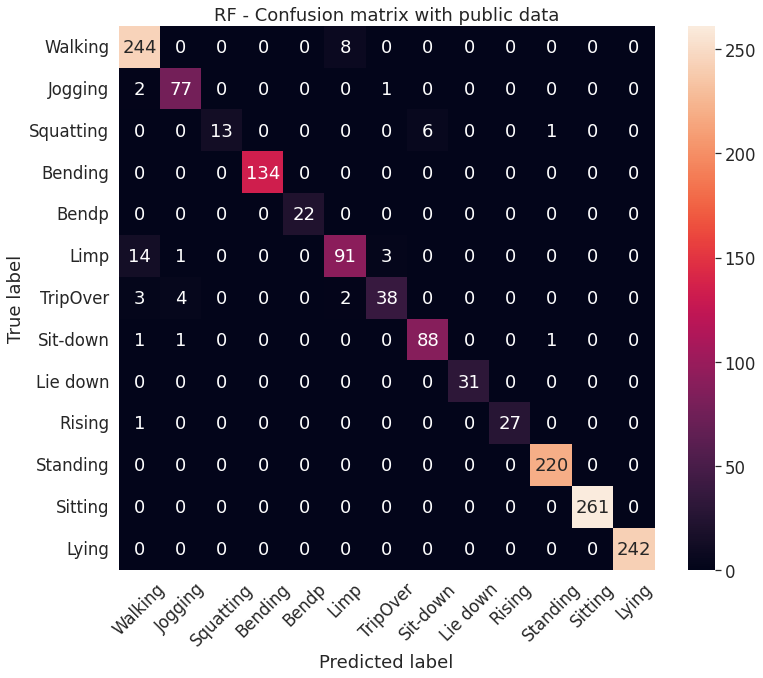

In [ ]:
y_pred = model_RF.predict(test_features)
lables = np.concatenate([target_names, ])

plot_confusion_matrix(label_window_test, y_pred, classes=lables,  
        title='RF - Confusion matrix with public data')


Confusion matrix, without normalization

 [[243   0   0   0   0   7   1   1   0   0   0   0   0]
 [  2  73   0   0   0   2   2   0   0   1   0   0   0]
 [  0   0  13   0   0   1   0   4   0   1   1   0   0]
 [  0   0   0 133   0   0   0   0   0   0   0   1   0]
 [  3   0   0   0  15   0   0   2   1   1   0   0   0]
 [ 18   1   0   0   0  88   2   0   0   0   0   0   0]
 [  1   3   0   0   0   5  38   0   0   0   0   0   0]
 [  2   1   1   0   0   0   0  87   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0  27   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 220   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 261   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0 241]] 



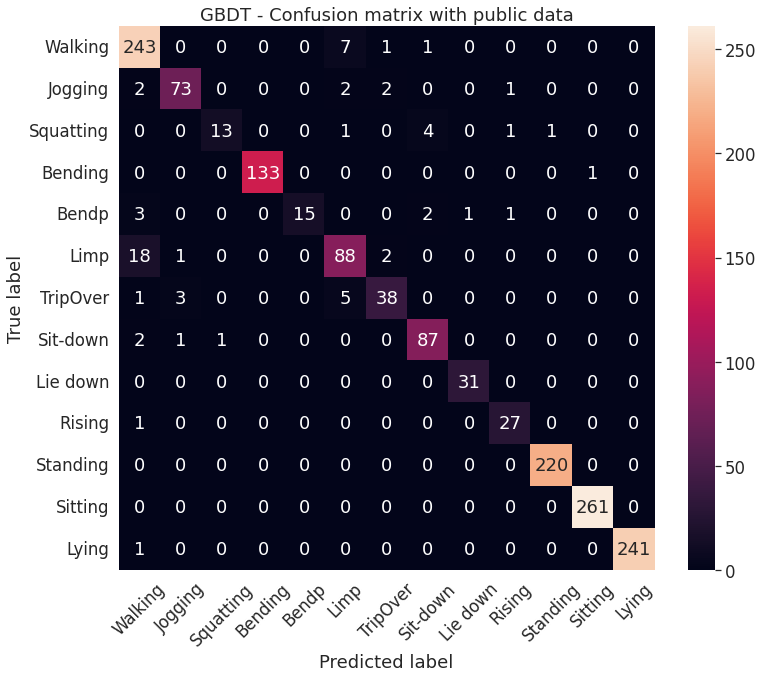

In [ ]:
y_pred = model_GBDT.predict(test_features)
lables = np.concatenate([target_names, ])

plot_confusion_matrix(label_window_test, y_pred, classes=lables,  
        title='GBDT - Confusion matrix with public data')


Confusion matrix, without normalization

 [[239   0   0   0   0  12   0   0   0   1   0   0   0]
 [  1  75   0   0   0   2   2   0   0   0   0   0   0]
 [  1   1   8   0   0   0   0   9   0   0   1   0   0]
 [  0   0   0 134   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  20   0   0   2   0   0   0   0   0]
 [ 28   2   0   0   0  77   2   0   0   0   0   0   0]
 [  1   4   0   0   0   7  35   0   0   0   0   0   0]
 [  0   2   1   0   0   0   0  87   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0  31   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0  27   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 220   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 261   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 242]] 



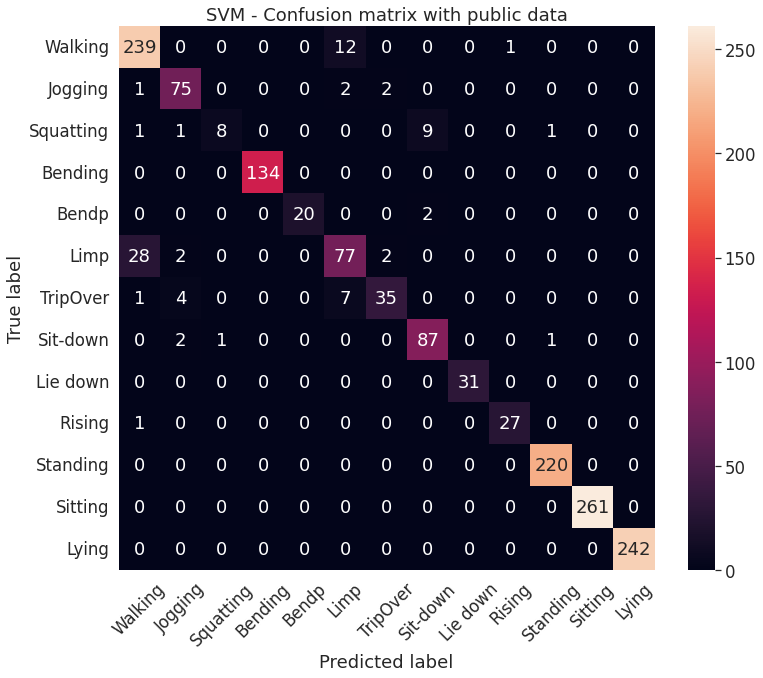

In [ ]:
y_pred = model_SVM.predict(test_features)
lables = np.concatenate([target_names, ])

plot_confusion_matrix(label_window_test, y_pred, classes=lables,  
        title='SVM - Confusion matrix with public data')


Confusion matrix, without normalization

 [[240   0   0   0   0  11   0   0   0   1   0   0   0]
 [  1  71   0   0   0   2   6   0   0   0   0   0   0]
 [  2   0  14   0   0   1   0   2   0   0   1   0   0]
 [  0   0   0 134   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0  20   1   0   0   0   0   0   0   0]
 [ 16   0   0   0   0  90   3   0   0   0   0   0   0]
 [  1   4   0   0   0   4  38   0   0   0   0   0   0]
 [  0   1   2   0   0   0   0  87   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   1]
 [  1   0   0   0   0   0   0   0   0  27   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 220   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 261   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 242]] 



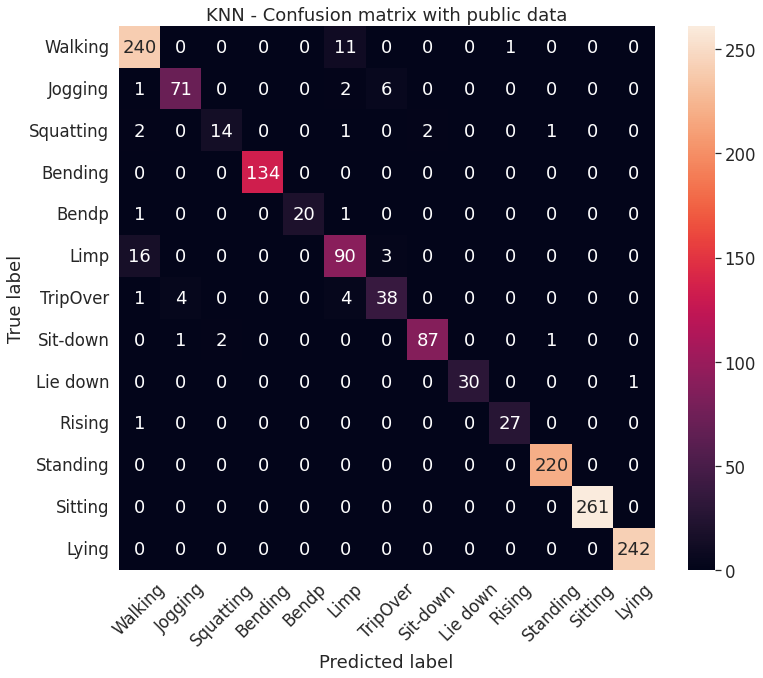

In [ ]:
y_pred = model_KNN.predict(test_features)
lables = np.concatenate([target_names, ])

plot_confusion_matrix(label_window_test, y_pred, classes=lables,  
        title='KNN - Confusion matrix with public data')

In [ ]:
def eva_matrix(actual,predict,list_name):
  arr = confusion_matrix(actual, predict)
  evalution_matrix =  pd.DataFrame(columns =list_name)
  FP = arr.sum(axis=0) - np.diag(arr)  
  FN = arr.sum(axis=1) - np.diag(arr)
  TP = np.diag(arr)
  TN = np.diag(arr).sum() -TP

  # Sensitivity, hit rate, recall, or true positive rate
  SEN = np.round((TP/(TP+FN))*100,decimals = 1).tolist()
  # Precision or positive predictive value
  PPV = np.round((TP/(TP+FP))*100,decimals = 1).tolist()
  # Negative predictive value
  NPV = np.round((TN/(TN+FN))*100,decimals = 1).tolist()
  # Overall accuracy
  ACC = np.round((TP+TN)/(TP+FP+FN+TN)*100,decimals = 1).tolist()
  # ACC = np.array((TP+TN)/(TP+FP+FN+TN)*100,dtype=np.float).tolist()

  # # Specificity or true negative rate
  # SPC = (TN/(TN+FP) ).tolist()
  # # Fall out or false positive rate
  # FPR = (FP/(FP+TN)).tolist()
  # # False negative rate
  # FNR = (FN/(TP+FN)).tolist()
  # # False discovery rate
  # FDR = (FP/(TP+FP)).tolist()
  # for i in range(len(evalution_matrix.columns)):
  #   data_append[evalution_matrix.columns[i]] = ACC[i]
  evalution_matrix = evalution_matrix.append(pd.DataFrame([ACC,SEN,PPV, NPV], columns =list_name))
  # print(evalution_matrix)
  return evalution_matrix
score_RF1 =round(score_RF*100,1)
score_DT1 =round(score_DT*100,1)
score_GBDT1 =round(score_GBDT*100,1)
score_SVM1 =round(score_SVM*100,1)
score_KNN1 =round(score_KNN*100,1)
result_f1_core = pd.DataFrame({'RF':[score_RF1],'DT':[score_DT1], 'DGBDT':[score_GBDT1],'SVM':[score_SVM1],'KNN': [score_KNN1]})
evalRF = eva_matrix(label_window_test, predictedRF,Activity_list)
evalDT = eva_matrix(label_window_test, predictedDT,Activity_list)
evalGBDT = eva_matrix(label_window_test, predictedGBDT,Activity_list)
evalSVM = eva_matrix(label_window_test, predicted_SVM,Activity_list)
evalKNN = eva_matrix(label_window_test, predicted_KNN,Activity_list)

!pip install XlsxWriter

resultRF = pd.DataFrame(evalRF)
resultDT = pd.DataFrame(evalDT)
resultGBDT = pd.DataFrame(evalGBDT)
resultSVM = pd.DataFrame(evalSVM)
resultKNN = pd.DataFrame(evalKNN)
income_sheets = {'F1_core': result_f1_core,'RF': resultRF, 'DT': resultDT,
                 'GBDT': resultGBDT, 'SVM': resultSVM,'KNN':resultKNN }
writer = pd.ExcelWriter(address+'/results/result_public.xlsx', engine='xlsxwriter')
for sheet_name in income_sheets.keys():
    income_sheets[sheet_name].to_excel(writer, sheet_name=sheet_name, index=False)
writer.save()